In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso ,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")

In [2]:
#data
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price']= boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_df.corr()['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

<AxesSubplot:>

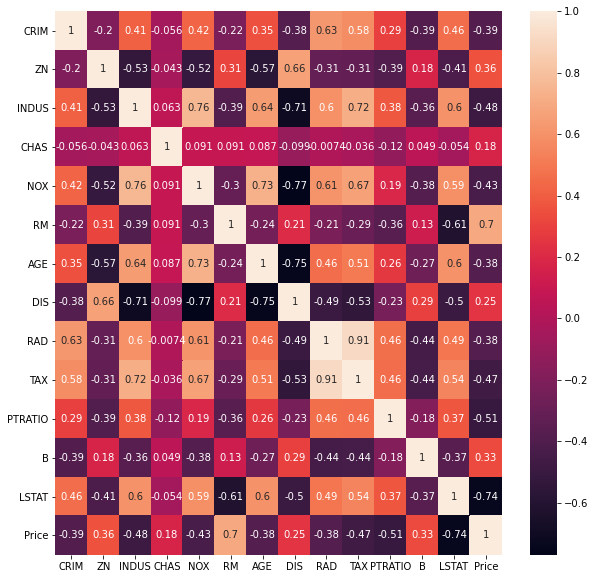

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_df.corr(),annot=True)

In [5]:
# Multicolinearity 


X = boston_df.drop(['Price'],axis=1)
y= boston_df['Price']

In [6]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [18]:
# Data Splitting and Scaling
#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [8]:
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (354, 13)
The dimension of X_test is (152, 13)


In [9]:
print(f"The Dimension of X_train is {X_train.shape}")

The Dimension of X_train is (354, 13)


In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# Linear and Ridge Regression Models

# Model1 :

lr = LinearRegression()
lr.fit(X_train,y_train)

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print(f"The Train score for lr model is {train_score_lr}")
print(f"The Test score for lr model is {test_score_lr}")

The Train score for lr model is 0.7295579805153971
The Test score for lr model is 0.7620882852026806


In [13]:
# Model2 - Ridge :

ridge_reg = Ridge(alpha=.1)
ridge_reg.fit(X_train,y_train)

train_score_ridge_reg = ridge_reg.score(X_train, y_train)
test_score_ridge_reg = ridge_reg.score(X_test, y_test)

print(f"The Train score for lr model is {train_score_ridge_reg}")
print(f"The Test score for lr model is {test_score_ridge_reg}")

The Train score for lr model is 0.729557697587067
The Test score for lr model is 0.7621092942777207


In [25]:
# Model 3 - Lasso

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train,y_train)

train_score_lasso_reg = lasso_reg.score(X_train, y_train)
test_score_lasso_reg = lasso_reg.score(X_test, y_test)

print(f"The Train score for lr model is {train_score_lasso_reg}")
print(f"The Test score for lr model is {test_score_lasso_reg}")

The Train score for lr model is 0.7294791623495855
The Test score for lr model is 0.7625429346990192


In [27]:
from sklearn.feature_selection import SelectFromModel
#lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)

model = SelectFromModel(lasso_reg)
model.fit(X_train, y_train)
selected_feat = X.columns[(model.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(model.estimator_.coef_ == 0)))

total features: 13
selected features: 12
features with coefficients shrank to zero: 1
